In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import edhec_risk_kit as erk
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
tmi = erk.get_total_market_index_returns()
tmi.head()

1926-07    0.031375
1926-08    0.028957
1926-09    0.005566
1926-10   -0.028504
1926-11    0.028039
Freq: M, dtype: float64

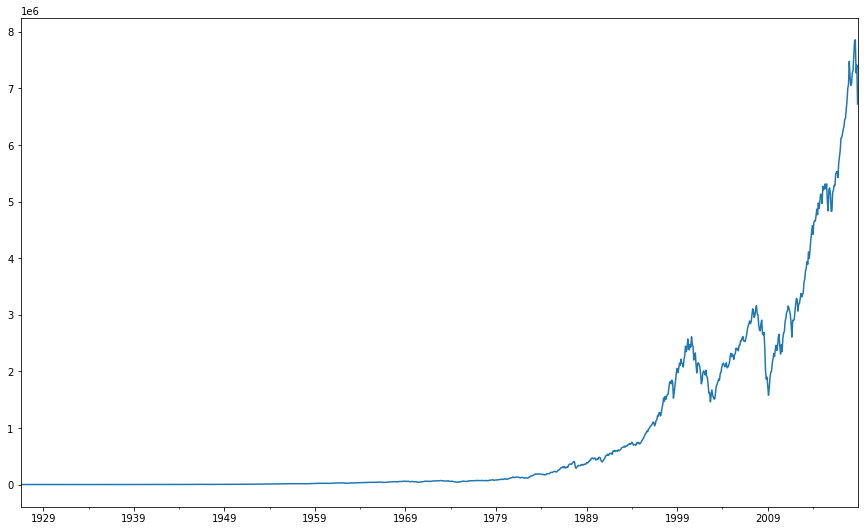

In [10]:
erk.drawdown(tmi)['Wealth'].plot(figsize=(15,9))

In [12]:
erk.annualize_rets(tmi, periods_per_year=12)

0.09996421117294352